<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/ML_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

**Redes Neurais**

In [1]:
import pandas as pd

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/volei%20-%20ok.csv')
treino.head(2)

,previsao,temperatura,umidade,vento,jogar
0,1,1,1,2,0
1,1,1,1,1,0


In [4]:

import tensorflow
from tensorflow import keras
#4 | 3 | 2 | 1
nn = keras.Sequential([
      keras.layers.Input((4,)),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(2, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam' , loss='binary_crossentropy')

nn.fit(treino[['previsao',  'temperatura',  'umidade',  'vento']] , treino['jogar'])
previsoes = nn.predict(treino[['previsao',  'temperatura',  'umidade',  'vento']] )
previsoes

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.8356
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0.50025   ],
       [0.44541225],
       [0.4604463 ],
       [0.3625018 ],
       [0.300419  ],
       [0.21285026],
       [0.28380498],
       [0.4960124 ],
       [0.47976738],
       [0.30507514],
       [0.3827036 ],
       [0.34899786],
       [0.39675054],
       [0.26589692]], dtype=float32)

In [5]:

limiar = 0.1
def ativacao(v):
  if(v > limiar):
    return 0
  else:
    return 1

prev_treino = []
for prev in previsoes:
  prev_treino.append(ativacao(prev))

prev_treino

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
y_treino = treino['jogar']
y_treino

,jogar
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [7]:
from sklearn.metrics import accuracy_score
acuracia_treino= accuracy_score(y_treino,prev_treino)
acuracia_treino*100

35.714285714285715

In [8]:
teste  = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/volei%20-%20prd.csv')
teste

,previsao,temperatura,umidade,vento
0,2,1,1,2
1,1,1,1,2
2,1,1,1,1
3,2,1,1,2
4,3,2,1,2
5,3,3,2,2


In [9]:
previsoes = nn.predict(teste[['previsao',  'temperatura',  'umidade',  'vento']] )
prev_teste = []
for prev in previsoes:
  prev_teste.append(ativacao(prev))

prev_teste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[0, 0, 0, 0, 0, 0]

In [10]:
#gabarito
y_teste = [1,0,0,0,1,0]
y_teste

[1, 0, 0, 0, 1, 0]

In [11]:
from sklearn.metrics import accuracy_score
acuracia_teste= accuracy_score(y_teste,prev_teste)
acuracia_teste*100

66.66666666666666

[[4 0]
 [2 0]]


<Axes: >

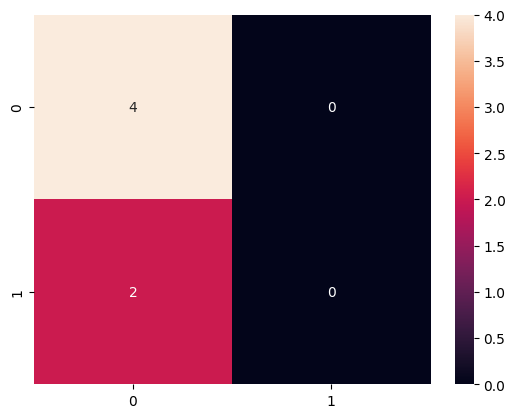

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_teste , prev_teste))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Exercicio - Redes Neurais**

In [15]:


import pandas as pd
import tensorflow
from tensorflow import keras


train = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
valid  = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever.csv')
#print(train)
print(valid)

nn = keras.Sequential([
    keras.layers.Input((len(train.columns)-1,)),
    keras.layers.Dense(3, activation='relu' ),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
nn.fit(train[['Genero','GrauEscolaridade','Profissao','Renda']],train['Inadimplente'], batch_size=20, epochs=4,validation_split=0.20)
previsao = nn.predict(valid[['Genero','GrauEscolaridade','Profissao','Renda']])
print(previsao)


   Genero  GrauEscolaridade  Profissao  Renda
0       1                 4          1   1.40
1       2                 7          9   2.60
2       1                 7          9   5.80
3       1                 7          9   4.70
4       1                 7          9   3.90
5       1                 8          9   3.25
6       1                 8          8   7.20
7       2                 4          3   1.25
Epoch 1/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4633 - loss: 0.6933 - val_accuracy: 0.3500 - val_loss: 0.6933
Epoch 2/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4033 - loss: 0.6932 - val_accuracy: 0.6500 - val_loss: 0.6929
Epoch 3/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6517 - loss: 0.6928 - val_accuracy: 0.6500 - val_loss: 0.6925
Epoch 4/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5550 - loss: 0.6928 - val_accuracy: 0.6500 - val_loss: 0.6921
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0.5016715]
 [0.5016715]
 [0.5016715]
 [0.5016715]

In [16]:
limiar = 0.54
def ativacao(prb):
  if(prb>=limiar):
    return 0
  else:
    return 1

p = list()
for prev in previsao:
  p.append(ativacao(prev))

print(p)

[1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
valid

,Genero,GrauEscolaridade,Profissao,Renda
0,1,4,1,1.40
1,2,7,9,2.60
2,1,7,9,5.80
3,1,7,9,4.70
4,1,7,9,3.90
5,1,8,9,3.25
6,1,8,8,7.20
7,2,4,3,1.25
